In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt


In [ ]:
def ba_network(N, m) :
    '''
    Generate and return a network with a scale-free degree distribution,
    generated according to the Barabási-Albert network model.

    Starting from `m0 = m` nodes in a fully-connected network, add a
    new node and connect it to `m` existing nodes with probability proportional
     to node degree. Repeat until there are `N` nodes in the network.
    '''
    # Initialize with fully-connected network
    m0 = m
    G = nx.complete_graph(m0)

    idx = np.array(range(N))    # Index of node labels (used for sampling)
    ks = np.zeros(N)            # Array of node degrees
    ks[:m0] = m0 - 1
    k_sum = m0 * (m0 - 1)       # Counter for total degree

    # Add t = N - m0 nodes
    for i in range(m0, N) :
        # Pick nodes to connect to
        ns = np.random.choice(idx, size=m, replace=False, p=ks/k_sum)

        # Add edges from new node (i) to selected nodes (ns)
        G.add_edges_from(zip([i]*m, ns))

        # Update degree array and counters
        ks[i] = m
        np.add.at(ks, ns, 1)
        k_sum = k_sum + 2*m

    return G

In [ ]:
m = 3
N = 10000

G = ba_network(N, m)

In [ ]:
def spread_info(prob, G):
    print(f"For probability = {prob}")
    # Set the probability of passing the information to neighbors
    p = prob
    sum_steps = 0
    sum_people = 0
    for i in range(0, 10):

        # Select a random node and assume it has information I
        start_node = random.choice(list(G.nodes))
        G.nodes[start_node]['info'] = 'I'

        # Initialize a list to keep track of which nodes have received the information
        infected_nodes = [start_node]
        active_nodes = infected_nodes

        # Initialize a counter for the number of steps required to reach the maximum number of nodes
        steps = 0

        # Keep passing the information until no new nodes are infected
        while True:
            new_infected_nodes = []
            for node in active_nodes:
                # Pass the information to neighbors with probability p
                for neighbor in G.neighbors(node):
                    if neighbor not in infected_nodes and random.random() < p:
                        G.nodes[neighbor]['info'] = 'I'
                        new_infected_nodes.append(neighbor)

            if len(new_infected_nodes) == 0:
                # No new nodes infected, stop passing the information
                break

            infected_nodes.extend(new_infected_nodes)
            active_nodes = new_infected_nodes
            steps += 1

        sum_steps += steps
        sum_people += len(infected_nodes)
        print(f"Test {i + 1}: Information was passed to {len(infected_nodes)} nodes in {steps} steps.")

        # Draw the graph for this iteration
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=False, node_size=10)
        plt.title(f"Iteration {i + 1}")
        plt.show()

    avg_steps = sum_steps / 10
    avg_people = sum_people / 10
    print(f"Average number of nodes infected = {avg_people}")
    print(f"Average number of steps = {avg_steps}")


For probability = 0.05
Test 1: Information was passed to 1 nodes in 0 steps.


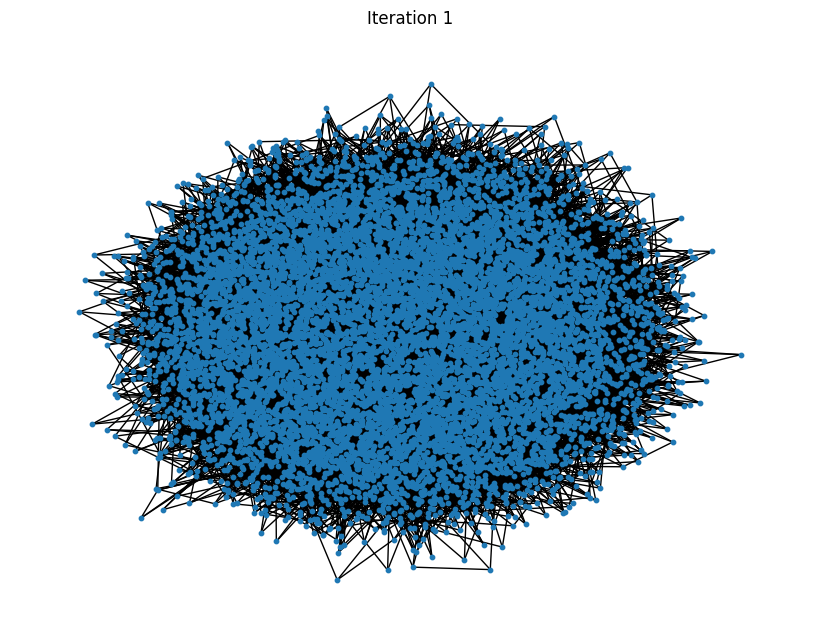

Test 2: Information was passed to 1 nodes in 0 steps.


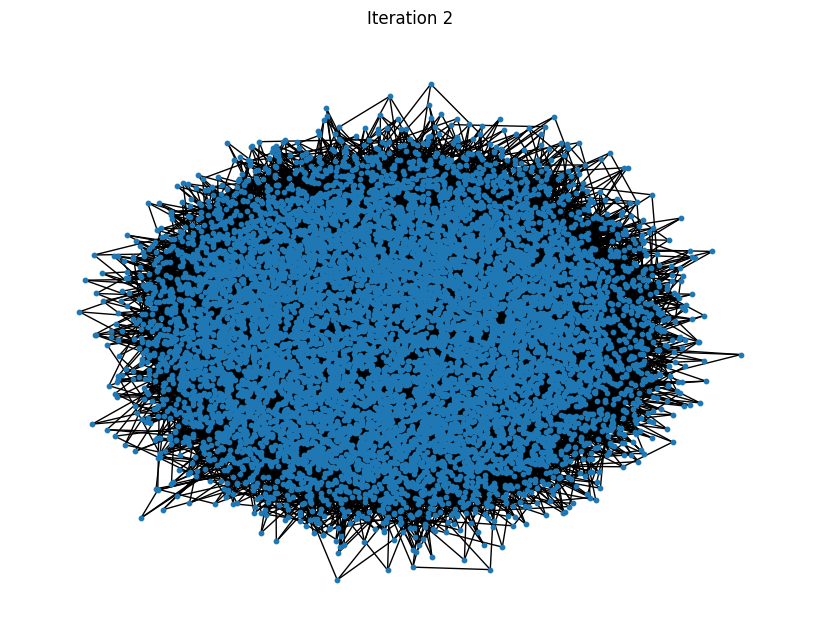

Test 3: Information was passed to 2 nodes in 1 steps.


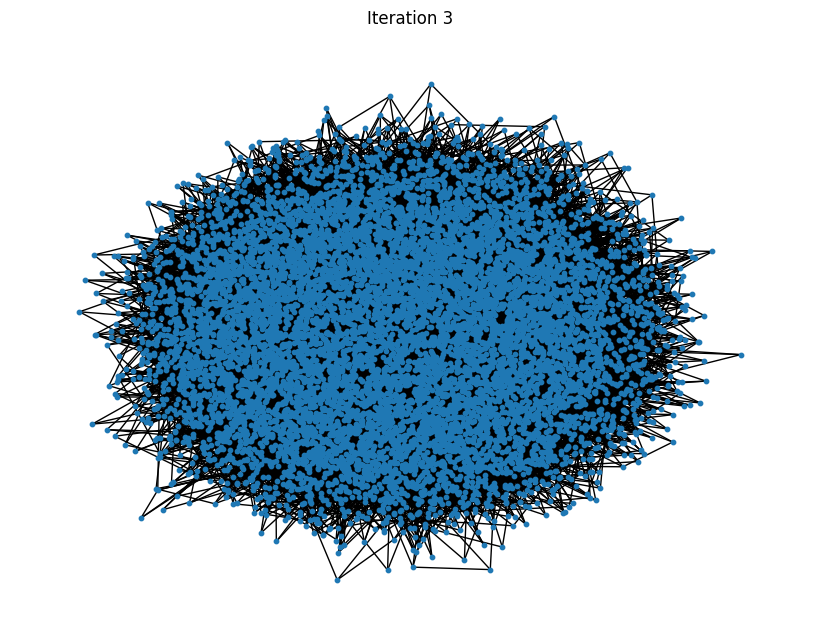

Test 4: Information was passed to 1 nodes in 0 steps.


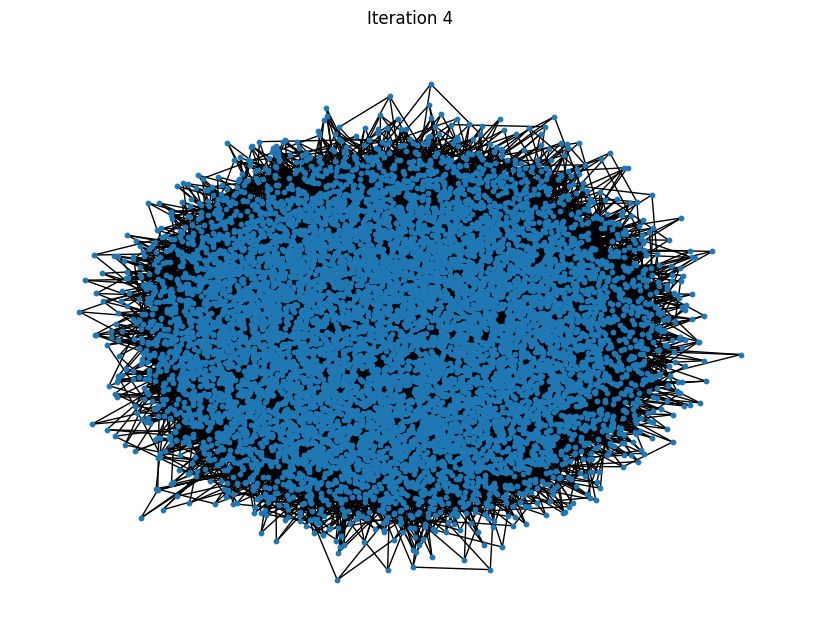

Test 5: Information was passed to 1 nodes in 0 steps.


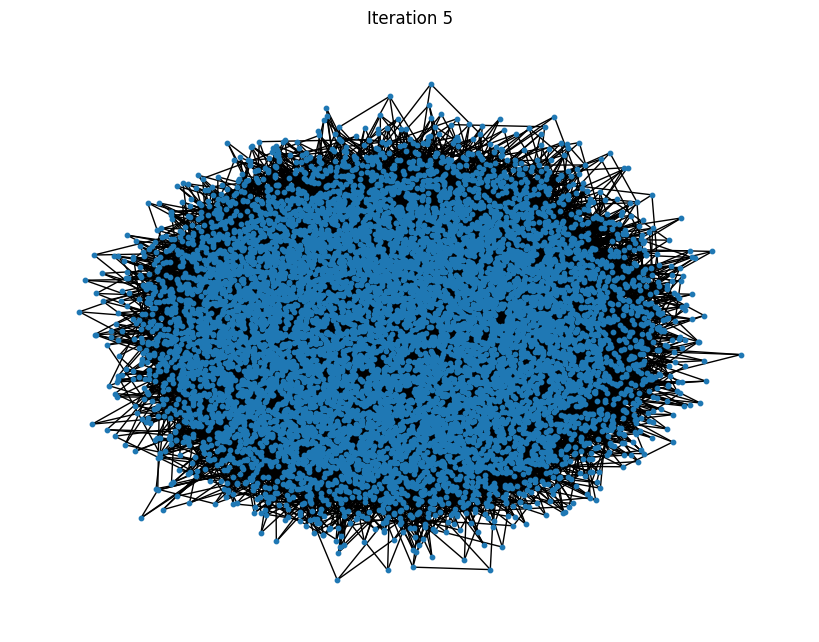

Test 6: Information was passed to 1 nodes in 0 steps.


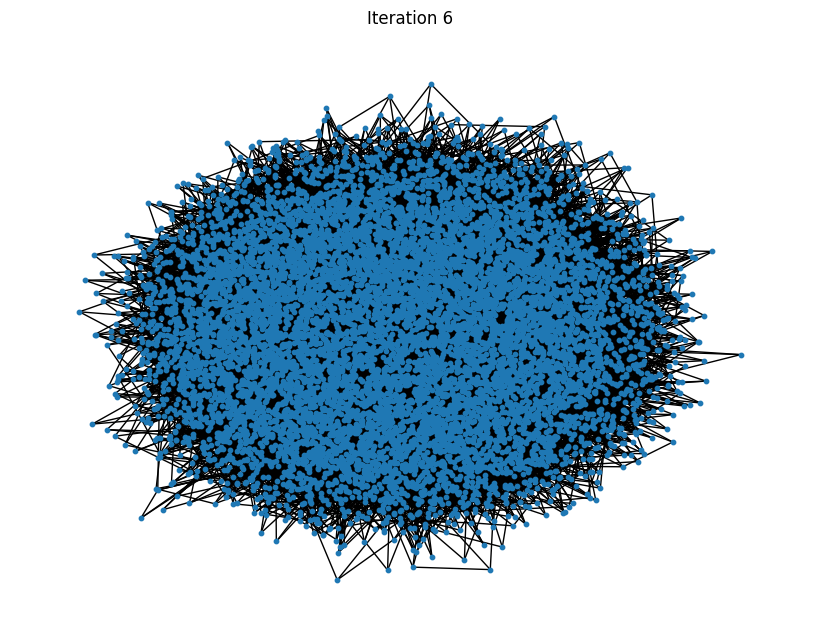

Test 7: Information was passed to 3 nodes in 1 steps.


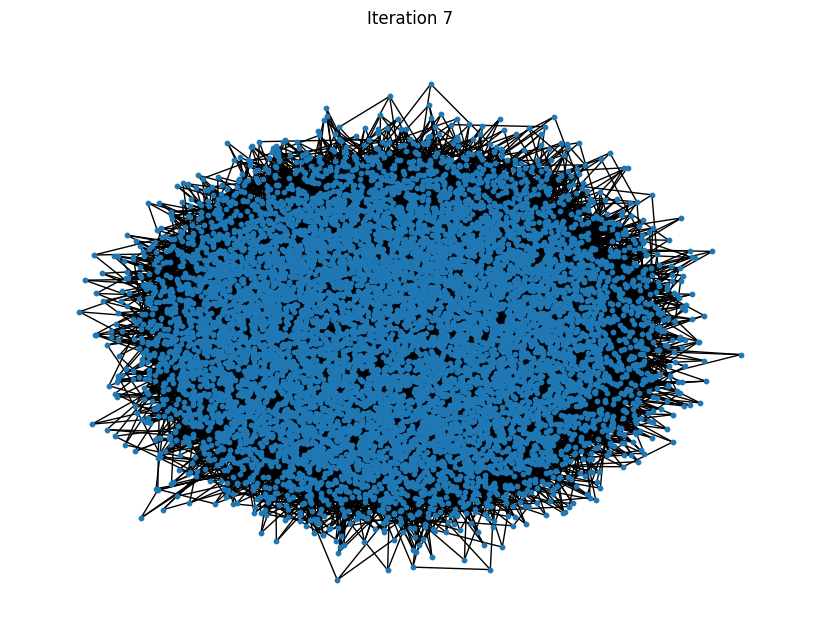

Test 8: Information was passed to 1 nodes in 0 steps.


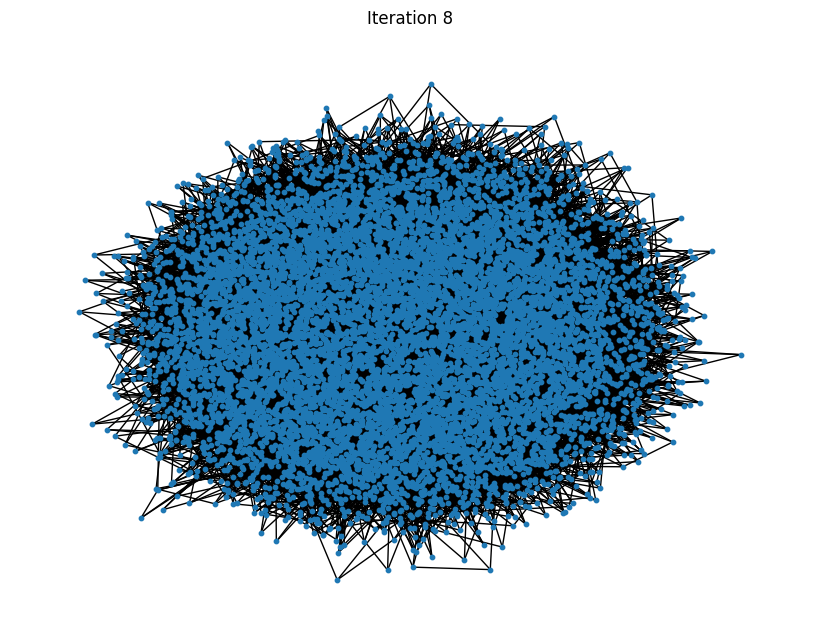

Test 9: Information was passed to 1 nodes in 0 steps.


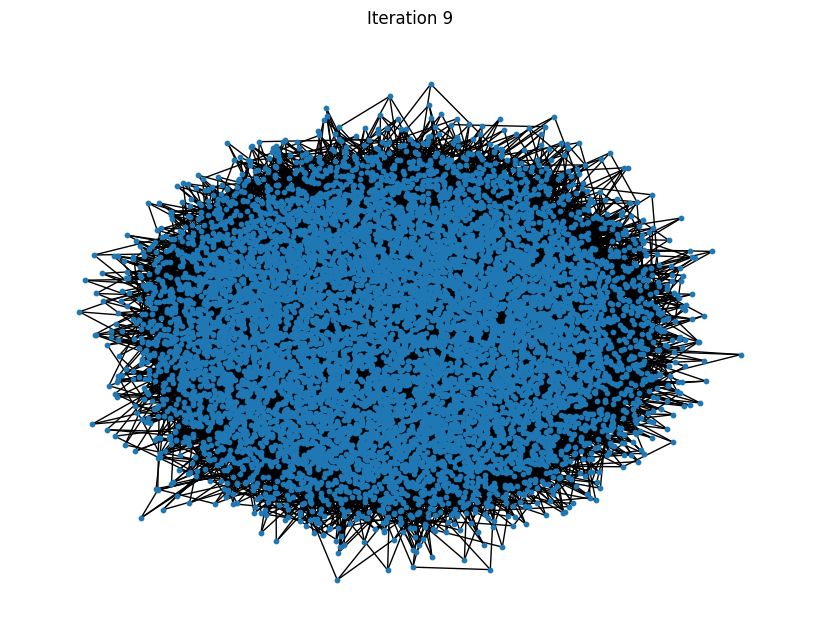

Test 10: Information was passed to 1 nodes in 0 steps.


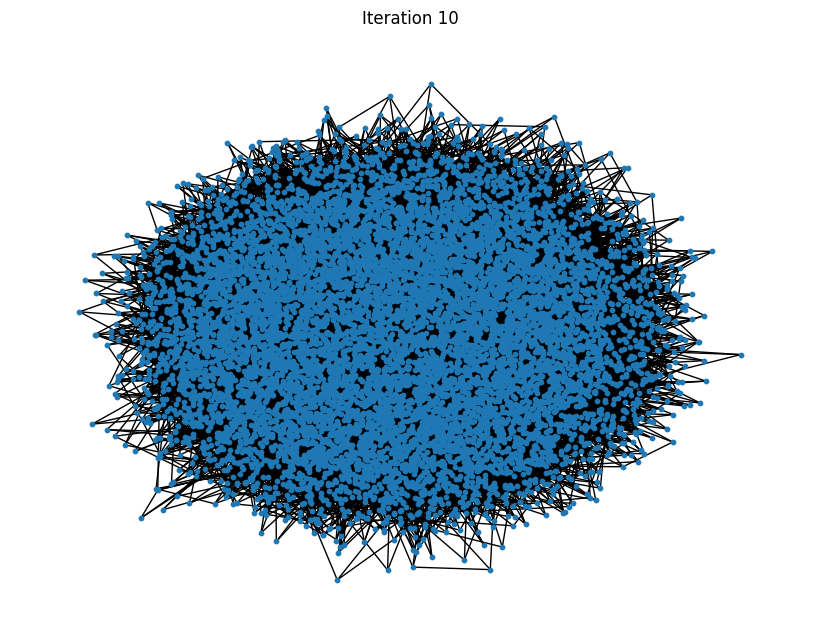

Average number of nodes infected = 1.3
Average number of steps = 0.2


In [ ]:
# Example usage
G = nx.barabasi_albert_graph(10000, 3)
spread_info(prob=0.05, G=G)